<a href="https://colab.research.google.com/github/christopher-reed/ag_data_project/blob/master/Poster_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Figures that I developed for UCLA's 2019 Undergraduate Research Fair and final research paper.**






In [0]:
#Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pickle
import copy
from datetime import datetime

Text(0.5, 0, 'Year')

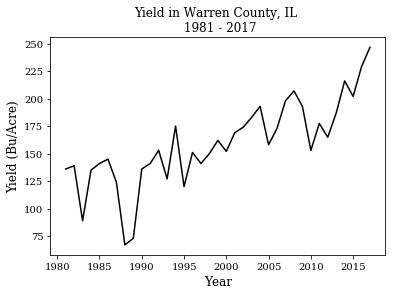

In [11]:
#Sample maize yield plot of one county in Illinois

df_yield = pd.read_csv('yield.csv')
df_yield = df_yield[(df_yield['state_fips'] == 17) & (df_yield['county'] == 'WARREN')]

plt.rcParams["font.family"] =  "serif"
x = df_yield['year']
y = df_yield['yield']
plt.plot(x,y, color = 'black')
plt.title('Yield in Warren County, IL \n 1981 - 2017')
plt.ylabel('Yield (Bu/Acre)', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')


Text(0.5, 1.0, 'Maize Yield in Illinois, USA \n 1981-2017')

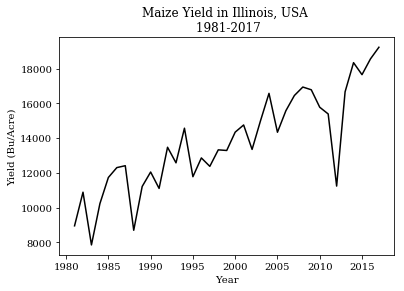

In [0]:
#State wide maize yield for paper

county_info = pickle.load(open('county_info_variance.p', 'rb'))

total_yield = pd.Series(np.zeros(37))
for county in county_info.keys():
  total_yield = total_yield.add(county_info[county][0]['yield'], fill_value = 0)
  
#Reverse values so 1981 is first and 2017 is last

y = total_yield.iloc[::-1].values
x= county_info['ADAMS'][0]['year'].iloc[::-1].values

plt.plot(x,y, color = 'black')
plt.xlabel('Year')
plt.ylabel('Yield (Bu/Acre)')
plt.title('Maize Yield in Illinois, USA \n 1981-2017')

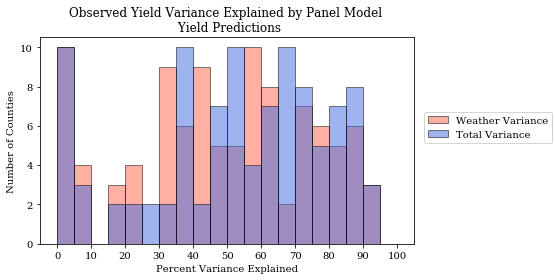

In [0]:
#Percent variance explained histogram for paper

county_info = pickle.load(open('county_info_variance.p', 'rb'))


total_variance = []
weather_variance =[]

for i in county_info:
  total_variance.append(county_info[i][3])
  weather_variance.append(county_info[i][4])
  

fig, ax = plt.subplots(1,1)
ax.hist(weather_variance, 20, range = [0, 100], alpha = 0.5, color = 'tomato', ec = 'black', label = 'Weather Variance')
ax.hist(total_variance, 20, range = [0, 100], alpha = 0.5, color = 'royalblue', ec = 'black', label = 'Total Variance')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Percent Variance Explained')
ax.set_ylabel('Number of Counties')
ax.set_title('Observed Yield Variance Explained by Panel Model \n Yield Predictions')
fig.legend(bbox_to_anchor=(0.97,0.6), loc = 'upper left')
fig.tight_layout()
fig.show()

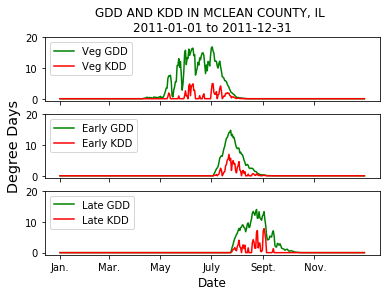

In [0]:
#Make function that plots phase-wise GDDs and KDDs. Function takes station name, start, and end date as a string
#Date format: yyyy-mm-dd

#Read in for fast startup
GDD_phases = pd.read_csv('GDD_phases.csv', index_col = 0)
KDD_phases = pd.read_csv('KDD_phases.csv', index_col = 0)

def plot_GDD_KDD(geoid, start_date, end_date):
  
  x = GDD_phases.loc[start_date:end_date].index
  y1 = GDD_phases.loc[start_date:end_date][str(geoid)+'_vegetative'].values
  y2 = KDD_phases.loc[start_date:end_date][str(geoid)+'_vegetative'].values
  y3 = GDD_phases.loc[start_date:end_date][str(geoid)+'_early_grain'].values  
  y4 = KDD_phases.loc[start_date:end_date][str(geoid)+'_early_grain'].values
  y5 = GDD_phases.loc[start_date:end_date][str(geoid)+'_late_grain'].values 
  y6 = KDD_phases.loc[start_date:end_date][str(geoid)+'_late_grain'].values  


  f, axarr = plt.subplots(3, sharex=True)
  axarr[0].plot(x, y1, color = 'green', label = 'Veg GDD')
  axarr[0].plot(x, y2, color = 'red', label = 'Veg KDD')
  axarr[0].legend(loc = 'upper left')
  axarr[0].set_title('GDD AND KDD IN ' + 'MCLEAN COUNTY' + ', ' + 'IL \n' + start_date + ' to ' + end_date, fontsize = 'large')
  axarr[0].set_yticks([0,10,20])
  #axarr[0].tick_params(labelsize=12)

  axarr[1].plot(x, y3, color = 'green', label = 'Early GDD')
  axarr[1].plot(x, y4, color = 'red', label = 'Early KDD')
  axarr[1].legend(loc = 'upper left')
  axarr[1].set_ylabel('Degree Days', fontsize = 'x-large')
  axarr[1].set_yticks([0,10,20])
  #axarr[1].tick_params(labelsize=14)

  axarr[2].plot(x, y5, color = 'green', label = 'Late GDD')
  axarr[2].plot(x, y6, color = 'red', label= 'Late KDD')
  axarr[2].legend(loc = 'upper left')
  axarr[2].set_yticks([0,10,20])
  axarr[2].set_xlabel('Date', fontsize = 'large')
  
  year = str(datetime.strptime(start_date, '%Y-%m-%d').year)
  axarr[2].set_xticks([year+'-01-01',year+'-03-01',year+'-05-01',year +'-07-01',year +'-09-01', year + '-11-01'])
  axarr[2].set_xticklabels(['Jan.','Mar.','May','July','Sept.', ' Nov.'])
  
#Test it out!
plot_GDD_KDD(17067, '2011-01-01', '2011-12-31')

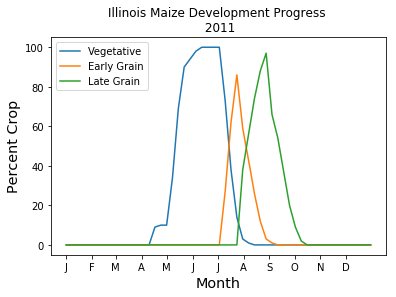

In [0]:
#Illinois statewide maize development data

df_development = pd.read_csv('illinois_combined_development_data.csv', index_col = 0)
df_development = copy.deepcopy(df_development.loc['2011-01-01':'2011-12-31'])
df_development.drop(['sum'], axis = 1, inplace = True)
df_development.rename(columns = {'vegetative':'Vegetative', 'early_grain':'Early Grain', 'late_grain':'Late Grain'}, inplace = True)

for i in df_development.columns:
  x = df_development.index
  y = df_development[i]
  plt.plot(x,y, label = i)
  
locs = ['2011-01-01','2011-02-01','2011-03-01','2011-04-01','2011-05-01','2011-06-01','2011-07-01','2011-08-01','2011-09-01','2011-10-01','2011-11-01','2011-12-01']
labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
  
plt.xticks(locs, labels)
plt.title('Illinois Maize Development Progress \n 2011')
plt.xlabel('Month', fontsize = 'x-large')
plt.ylabel('Percent Crop', fontsize = 'x-large')
plt.legend(loc = 'upper left', prop={'size': 10})
plt.rcParams["font.family"] =  "Times"

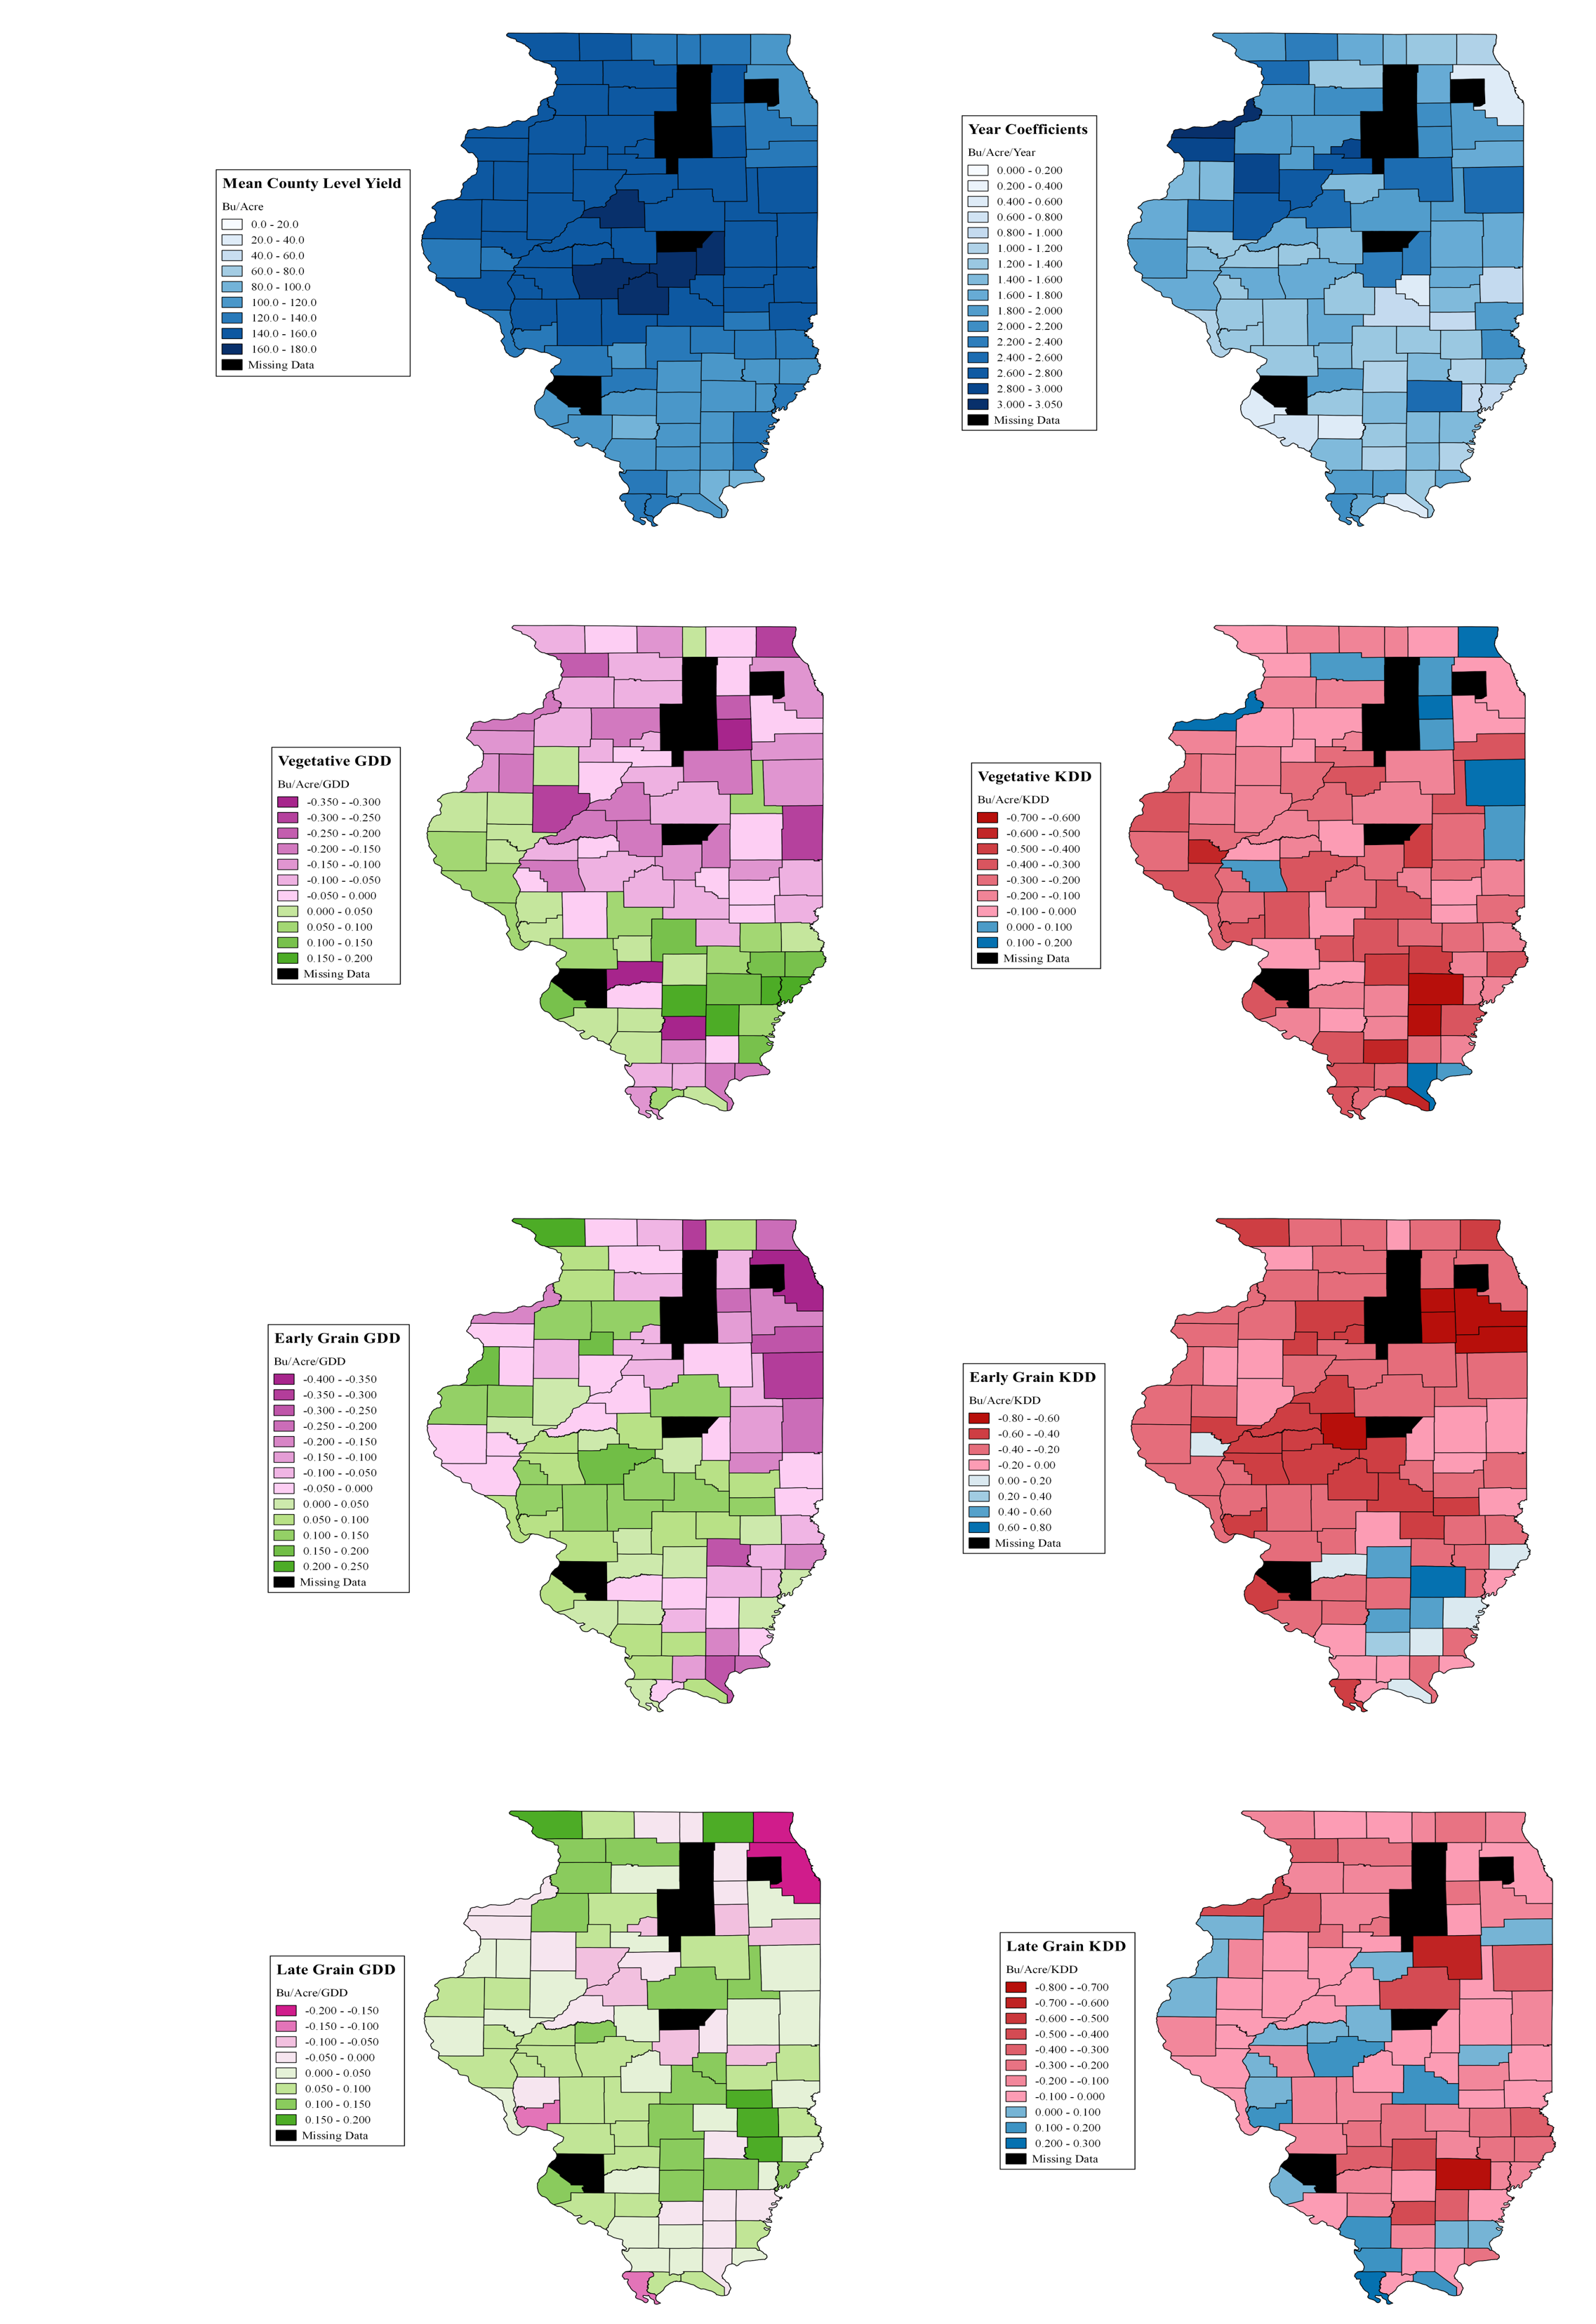

In [12]:
#Upload regression coefficient images developed using QGIS.
from google.colab import files
from IPython.display import Image
Image("Illinois_Complete_Regression_Set.png", width=900)

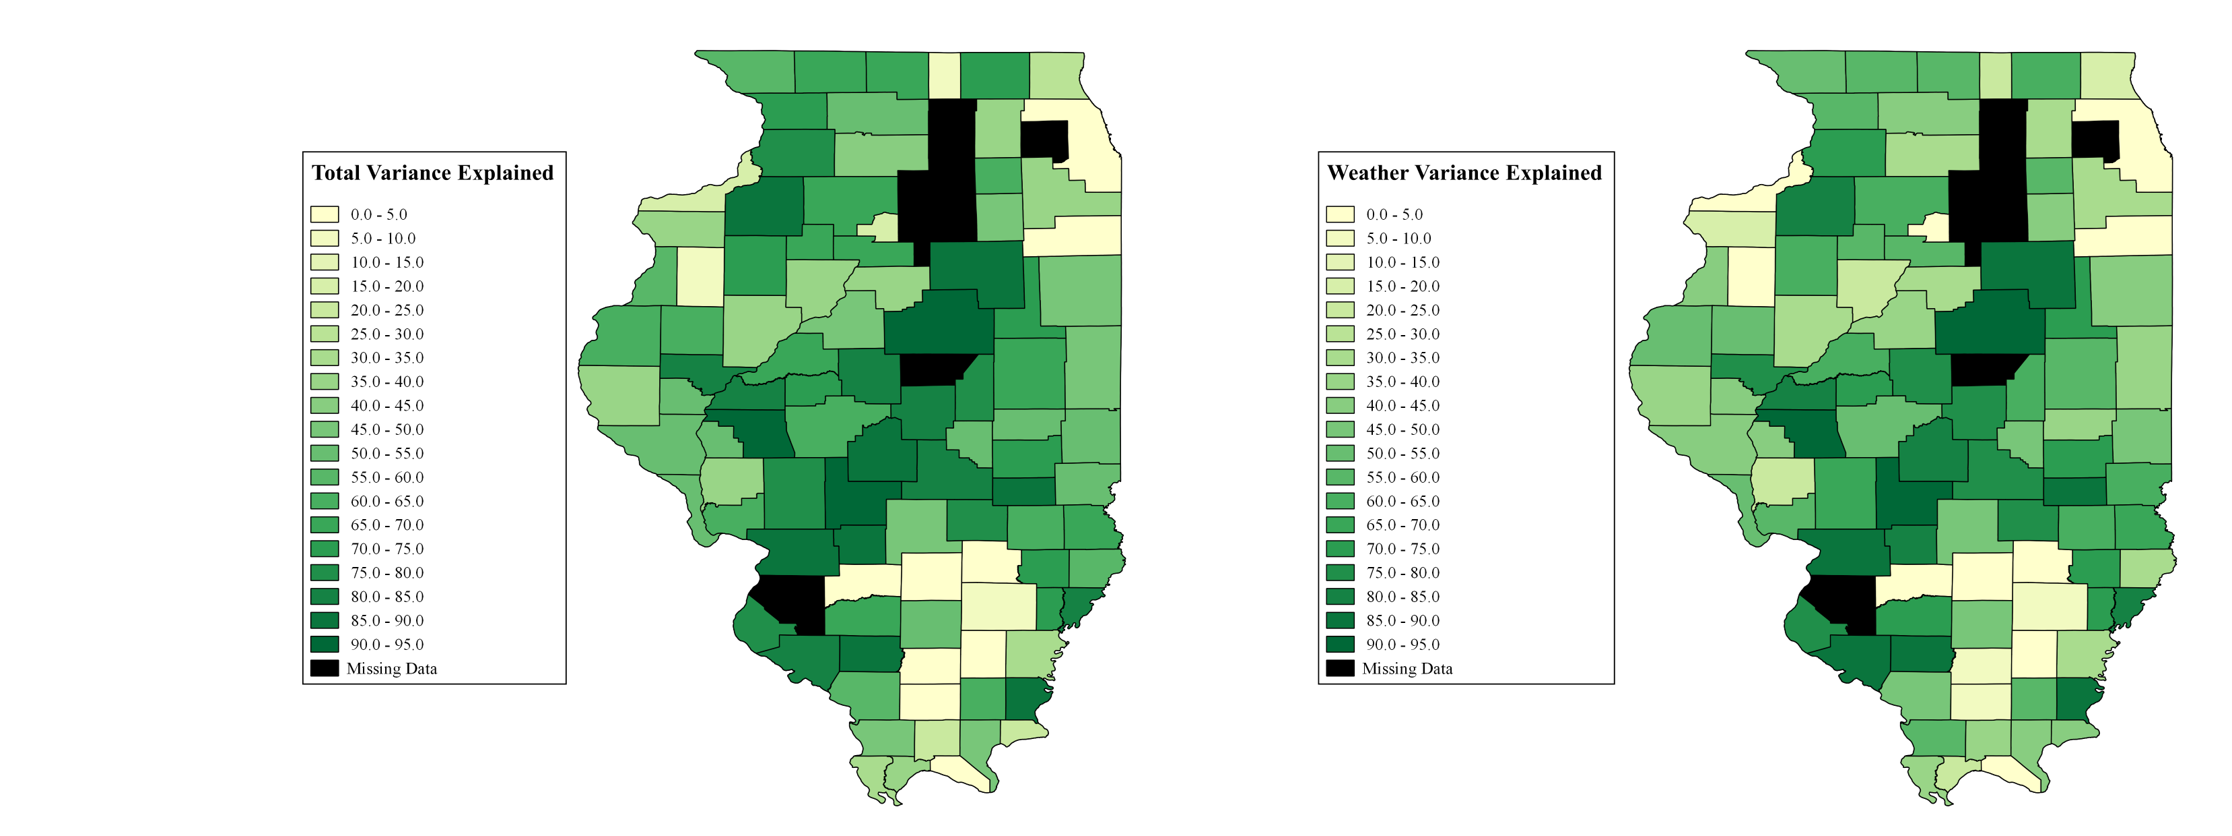

In [13]:
#Upload percent variance exaplined images
Image("Variance_Explained_Set.png", width=900)